In [1]:
%pylab inline
import os
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
import re
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer
from keras.optimizers import SGD

seed = 128
rng = np.random.RandomState(seed)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
root = "/home/ubuntu/music/Checked/"
path = os.path.join(root, "targetdirectory")
list1 = []

for path, subdirs, files in os.walk(root):
    for name in files:
        if name.endswith(".png"):
            cla = re.search('Checked/(\d+)', os.path.join(path))
            path1 = os.path.join(path) + '/' + name
            list1.append([os.path.join(name), path1, cla.group(1)])

dff = pd.DataFrame(list1, columns=['name','path','key'])

In [3]:
    temp = []
    i = 0
    for img_name in dff['path']:
        if os.path.isfile(img_name):
            image_path = os.path.join(img_name)
    #         print image_path
            img = imread(image_path, flatten=True)
            img = img.astype('float32')
            temp.append(img)
            i += 1
print i

5194


In [4]:
y = dff['key'].values
x=np.stack(temp)
x = x.reshape(i, 300, 300, 1).astype('Float32')
# x = x.reshape(i, 90000).astype('Float32')
x /= 255.0
x = 1.0 - x
print x.shape
print y.shape

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


(5194, 300, 300, 1)
(5194,)


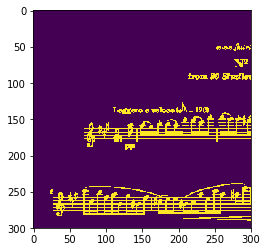

In [15]:
plt.imshow(x[111].reshape(300,300))

In [30]:
xtr, xte, ytr, yte = train_test_split(x, y, stratify=y)
ytr = keras.utils.np_utils.to_categorical(ytr, 12)
yte = keras.utils.np_utils.to_categorical(yte, 12)

In [31]:
input_num_units = 90000
hidden_num_units = 20
output_num_units = 12
epochs = 14
batch_size = 128
pixel_count = 90000

In [49]:
model = Sequential()
model.add(Convolution2D(12, 4, 4, input_shape=(300, 300, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(12, 4, 4))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(120))
model.add(Activation('relu'))
model.add(Dense(12))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
              optimizer='rmsprop')


# RMSProp
rms = keras.optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
              optimizer='rmsprop')

# Adagrade Optimizer
# adagrad = keras.optimizers.Adagrad(lr=0.005, epsilon=1e-08, decay=0.0)
# model.compile(loss='categorical_crossentropy', optimizer=adagrad,  metrics=['accuracy'])

In [50]:
# model.fit(xtr, ytr, batch_size=72, nb_epoch=14, verbose=2, validation_data=(xte, yte))
# score, acc = model.evaluate(xte, yte, verbose=0)
# print('Test accuracy:', acc)

Train on 3895 samples, validate on 1299 samples
Epoch 1/14
13s - loss: 2.1690 - acc: 0.2719 - val_loss: 1.8384 - val_acc: 0.3895
Epoch 2/14
12s - loss: 1.3032 - acc: 0.5869 - val_loss: 1.6231 - val_acc: 0.5096
Epoch 3/14
12s - loss: 0.6173 - acc: 0.8113 - val_loss: 1.3765 - val_acc: 0.5989
Epoch 4/14
13s - loss: 0.2574 - acc: 0.9258 - val_loss: 1.1185 - val_acc: 0.6782
Epoch 5/14
12s - loss: 0.1291 - acc: 0.9617 - val_loss: 1.0439 - val_acc: 0.6936
Epoch 6/14
12s - loss: 0.0447 - acc: 0.9890 - val_loss: 1.3664 - val_acc: 0.6851
Epoch 7/14
12s - loss: 0.0468 - acc: 0.9882 - val_loss: 0.9768 - val_acc: 0.7383
Epoch 8/14
12s - loss: 0.0224 - acc: 0.9938 - val_loss: 0.9311 - val_acc: 0.7521
Epoch 9/14
12s - loss: 0.0336 - acc: 0.9920 - val_loss: 0.8820 - val_acc: 0.7560
Epoch 10/14
12s - loss: 0.0051 - acc: 0.9995 - val_loss: 1.1410 - val_acc: 0.7583
Epoch 11/14
12s - loss: 0.0045 - acc: 0.9987 - val_loss: 1.2982 - val_acc: 0.7213
Epoch 12/14
12s - loss: 0.0079 - acc: 0.9977 - val_loss: 1.

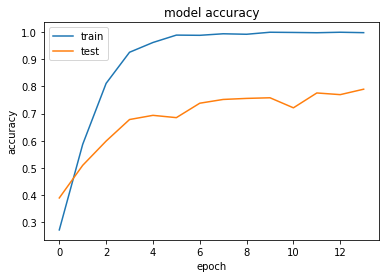

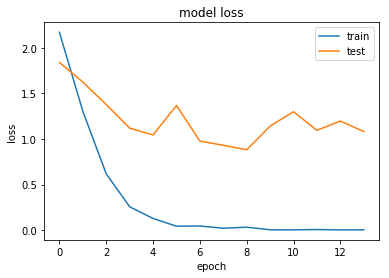

In [51]:
trained_model = model.fit(xtr, ytr, batch_size=72, nb_epoch=14, verbose=2, validation_data=(xte, yte))
# list all data in history
print(trained_model.history.keys())
# summarize history for accuracy
plt.plot(trained_model.history['acc'])
plt.plot(trained_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# summarize history for loss
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [54]:
score = model.evaluate(xte, yte, show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
# print(model.predict_classes(xte[1:5]))
# print(yte[1:5])

('Test score:', 1.081161981343856)
('Test accuracy:', 0.78983833782483837)


In [69]:
from sklearn.metrics import classification_report,confusion_matrix

Y_pred = model.predict(xte)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

y_pred = model.predict_classes(xte)
print(y_pred)

p=model.predict_proba(xte)

target_names = ['C','G','D','A','E','B','Gb','Db','Ab','Eb','Bb','F']
print(classification_report(np.argmax(yte,axis=1), y_pred, target_names=target_names))
print(confusion_matrix(np.argmax(yte,axis=1), y_pred))

[[  1.76837982e-03   8.16999935e-04   1.55558158e-02 ...,   1.79298098e-07
    3.29634422e-05   3.64697161e-12]
 [  7.72028434e-05   4.75272195e-08   4.33733732e-07 ...,   2.57283216e-04
    1.50306607e-11   5.10046783e-10]
 [  8.76930417e-10   9.99551713e-01   7.40985342e-05 ...,   1.95820760e-07
    2.88297233e-05   3.43544758e-04]
 ..., 
 [  2.39665106e-08   4.80734030e-08   2.26366978e-08 ...,   3.48177986e-10
    2.34230919e-14   8.79130244e-15]
 [  3.11631108e-15   9.99999881e-01   2.68895739e-10 ...,   1.59206606e-11
    1.10004249e-10   7.07952056e-12]
 [  4.02725732e-07   5.54311700e-05   9.99238133e-01 ...,   2.58180022e-04
    1.41239667e-04   1.33013289e-08]]
[3 3 1 ..., 3 1 2]
1248/1299 [===========================>..] - ETA: 0s             precision    recall  f1-score   support

          C       0.83      0.95      0.89       229
          G       0.82      0.91      0.86       292
          D       0.73      0.81      0.77       205
          A       0.76      0.76    

In [65]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_19 (Convolution2D) (None, 297, 297, 12)  204         convolution2d_input_10[0][0]     
____________________________________________________________________________________________________
activation_37 (Activation)       (None, 297, 297, 12)  0           convolution2d_19[0][0]           
____________________________________________________________________________________________________
maxpooling2d_19 (MaxPooling2D)   (None, 148, 148, 12)  0           activation_37[0][0]              
____________________________________________________________________________________________________
convolution2d_20 (Convolution2D) (None, 145, 145, 12)  2316        maxpooling2d_19[0][0]            
___________________________________________________________________________________________